In [2]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
EMOTION_LEXICON = {
    'happy': ['happy', 'joy', 'excited', 'yay', 'woohoo', '😊', '😂', '🥳', 'awesome', 'amazing'],
    'sad': ['sad', 'cry', 'depressed', '😢', '😭', 'heartbroken', 'mourn', 'grief'],
    'angry': ['angry', 'mad', 'furious', 'rage', '😠', '🤬', 'pissed', 'annoyed'],
    'fearful': ['scared', 'fear', 'terrified', 'anxious', '😨', 'nervous', 'worried'],
    'surprised': ['surprised', 'shocked', 'wow', 'omg', '😲', 'mindblown', 'astonished'],
    'love': ['love', 'heart', 'adorable', '😍', '❤️', 'crush', 'romantic', 'sweet'],
    'disgust': ['disgust', 'ew', 'gross', '🤢', '🤮', 'revolting', 'nasty']
}

SLANG_DICT = {
    'lol': 'laughing out loud',
    'rofl': 'rolling on floor laughing',
    'smh': 'shaking my head',
    'tbh': 'to be honest',
    'idk': "i don't know",
    'btw': 'by the way',
    'imo': 'in my opinion',
    'fyi': 'for your information',
    'omg': 'oh my god',
    'wtf': 'what the hell',
    'nbd': 'no big deal',
    'yolo': 'you only live once'
}

def preprocess_text(text):
    """Creative text preprocessing with slang conversion and emoji handling"""
    text = text.lower()
    for slang, full_form in SLANG_DICT.items():
        text = text.replace(slang, full_form)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#\w+', '', text)
    text = re.sub(r'[^\w\s\'.,!?😀-🙏]', '', text)

    return text.strip()

def analyze_emotions(text):
    """Creative emotion analysis with score weighting"""
    text = preprocess_text(text)
    emotion_scores = defaultdict(int)
    total_matches = 0
    for emotion, keywords in EMOTION_LEXICON.items():
        for keyword in keywords:
            if keyword in text:
                # Give more weight to emojis
                weight = 2 if any(c in keyword for c in ['😊','😢','😠','😨','😲','😍','🤢']) else 1
                emotion_scores[emotion] += weight
                total_matches += weight

    # Calculate percentages if matches found
    if total_matches > 0:
        for emotion in emotion_scores:
            emotion_scores[emotion] = round((emotion_scores[emotion] / total_matches) * 100, 1)

    return dict(emotion_scores)

def visualize_emotions(emotion_scores, text):
    """Creative visualization of emotion analysis"""
    # Bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(emotion_scores.keys(), emotion_scores.values(), color=[
        '#FFD700', '#87CEEB', '#FF6347', '#9370DB', '#FFA500', '#FF69B4', '#32CD32'
    ])
    plt.title("Emotion Distribution in Social Media Text")
    plt.ylabel("Emotion Score (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Word cloud of emotions
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(emotion_scores)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Emotion Word Cloud")
    plt.show()

def main():
    print("🎭 Emotion Decoder: Social Media Sentiment Analysis 🎭")
    print("Enter social media text (press Enter twice to finish):")

    # Get multi-line input
    lines = []
    while True:
        line = input()
        if line:
            lines.append(line)
        else:
            break
    text = ' '.join(lines)

    if not text.strip():
        print("No text entered. Exiting...")
        return

    # Analyze and visualize
    emotion_scores = analyze_emotions(text)
    print("\n🔍 Emotion Analysis Results:")
    for emotion, score in emotion_scores.items():
        print(f"{emotion.capitalize()}: {score}%")

    visualize_emotions(emotion_scores, text)

if __name__ == "__main__":
    main()


🎭 Emotion Decoder: Social Media Sentiment Analysis 🎭
Enter social media text (press Enter twice to finish):
fyi
fyi


KeyboardInterrupt: Interrupted by user

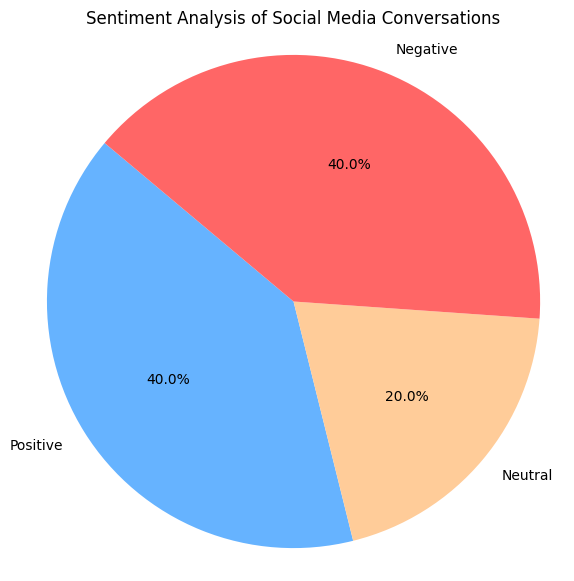

In [3]:
# Sentiment Analysis of Social Media Comments using TextBlob

from textblob import TextBlob
import matplotlib.pyplot as plt

# Sample social media comments (you can replace these with actual comments from a CSV or API)
comments = [
    "I love this product! It's amazing 😊",
    "Worst service ever. Very disappointed 😡",
    "It's okay, not too bad, not too good.",
    "Wow! Totally impressed with the update. Great job!",
    "I'm sad about the new changes.",
    "This is the best day of my life!",
    "I'm confused... not sure how I feel about this.",
    "Absolutely terrible experience. Will never come back.",
    "Feeling grateful and blessed 🙏",
    "Meh. It’s whatever."
]

# Classifying sentiments
emotions = {"Positive": 0, "Neutral": 0, "Negative": 0}

for comment in comments:
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        emotions["Positive"] += 1
    elif polarity < -0.1:
        emotions["Negative"] += 1
    else:
        emotions["Neutral"] += 1

# 📊 Visualization
labels = emotions.keys()
sizes = emotions.values()
colors = ['#66b3ff', '#ffcc99', '#ff6666']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Analysis of Social Media Conversations")
plt.axis('equal')
plt.show()


In [6]:
from textblob import TextBlob

# Sample social media comments
comments = [
    "I love this product! It's amazing 😊",
    "Worst service ever. Very disappointed 😡",
    "It's okay, not too bad, not too good.",
    "Wow! Totally impressed with the update. Great job!",
    "I'm sad about the new changes.",
    "This is the best day of my life!",
    "I'm confused... not sure how I feel about this.",
    "Absolutely terrible experience. Will never come back.",
    "Feeling grateful and blessed 🙏",
    "Meh. It’s whatever."
]

# Emotion categories
emotions = {"Positive": 0, "Neutral": 0, "Negative": 0}

# Analyze each comment
for comment in comments:
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        emotions["Positive"] += 1
    elif polarity < -0.1:
        emotions["Negative"] += 1
    else:
        emotions["Neutral"] += 1

# Print the result
print("Sentiment Analysis Result:")
for emotion, count in emotions.items():
    print(f"{emotion}: {count}")


Sentiment Analysis Result:
Positive: 4
Neutral: 2
Negative: 4
